In [ ]:
# 지도학습 : train(X_train, y_train) => y_train으로 답을 알려줘서 학습시킴
#        predict(X_test)

# 비지도학습 : train(X_train) => 답을 알려주지 않음
#        predict(X_test)

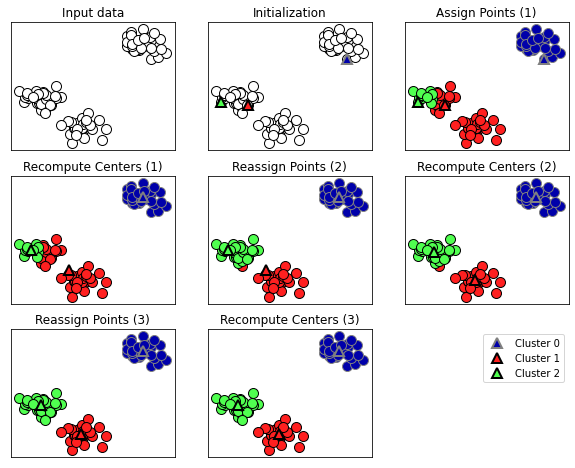

In [1]:
%matplotlib inline
import mglearn

mglearn.plots.plot_kmeans_algorithm()

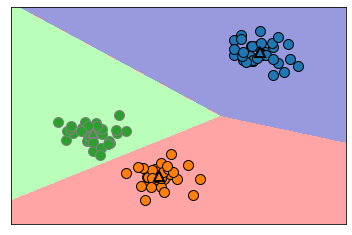

In [2]:
mglearn.plots.plot_kmeans_boundaries()

In [10]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1,2], [1,4], [1,0], [10,2], [10,4], [10,0]])

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_) # 모형이 분류한 라벨

X_new = np.array([[0,0], [12,3]])
print(kmeans.predict(X_new)) # 새로운 데이터를 모형이 분류한 라벨

print(kmeans.cluster_centers_) # 중심값

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


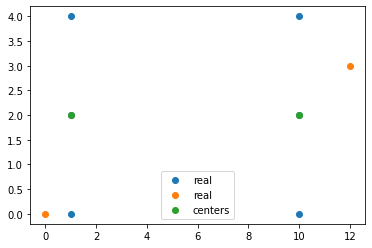

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],label='real')
plt.scatter(X_new[:,0],X_new[:,1],label='real')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='centers')
plt.legend()
plt.show()

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)
model = KMeans(n_clusters=3)
model.fit(X) # 학습시킬 때 y 값을 주지 않음

KMeans(n_clusters=3)

In [13]:
lbl = model.labels_
print(lbl)

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [14]:
pred = model.predict(X)
print(pred)

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [15]:
import sklearn.metrics as sm
sm.accuracy_score(y, pred)

0.33

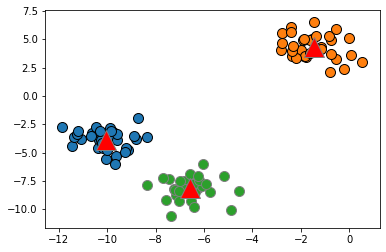

In [16]:
mglearn.discrete_scatter(X[:,0],X[:,1],lbl,markers='o') # 산점도
mglearn.discrete_scatter(model.cluster_centers_[:,0],
model.cluster_centers_[:,1],[0,1,2],markers='^',c='r',s=20) # 중심좌표

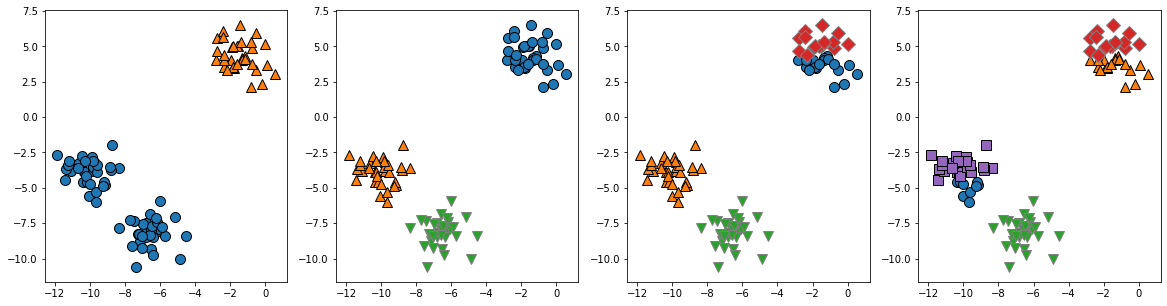

In [9]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1,4,figsize=(20,5))
idx = 0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_

    mglearn.discrete_scatter(X[:,0], X[:,1], lbls, ax=axes[idx])
    idx+=1

In [ ]:
# 오존량 예측

In [17]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/ozone/ozone.csv")
df["Result"].value_counts()

1.0    92
0.0    61
Name: Result, dtype: int64

In [18]:
cols = ["Solar.R","Wind","Temp"]
X = df[cols]
y = df["Result"]

array([[<AxesSubplot:xlabel='Ozone', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Wind', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Temp', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Result', ylabel='Ozone'>],
       [<AxesSubplot:xlabel='Ozone', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Temp', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Result', ylabel='Solar.R'>],
       [<AxesSubplot:xlabel='Ozone', ylabel='Wind'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Temp', ylabel='Wind'>,
        <AxesSubplot:xlabel='Result', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Ozone', ylabel='Temp'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Temp'>,
        <AxesSubplot:xlabel='Wind', ylabel='Temp'>,
        <AxesSubplo

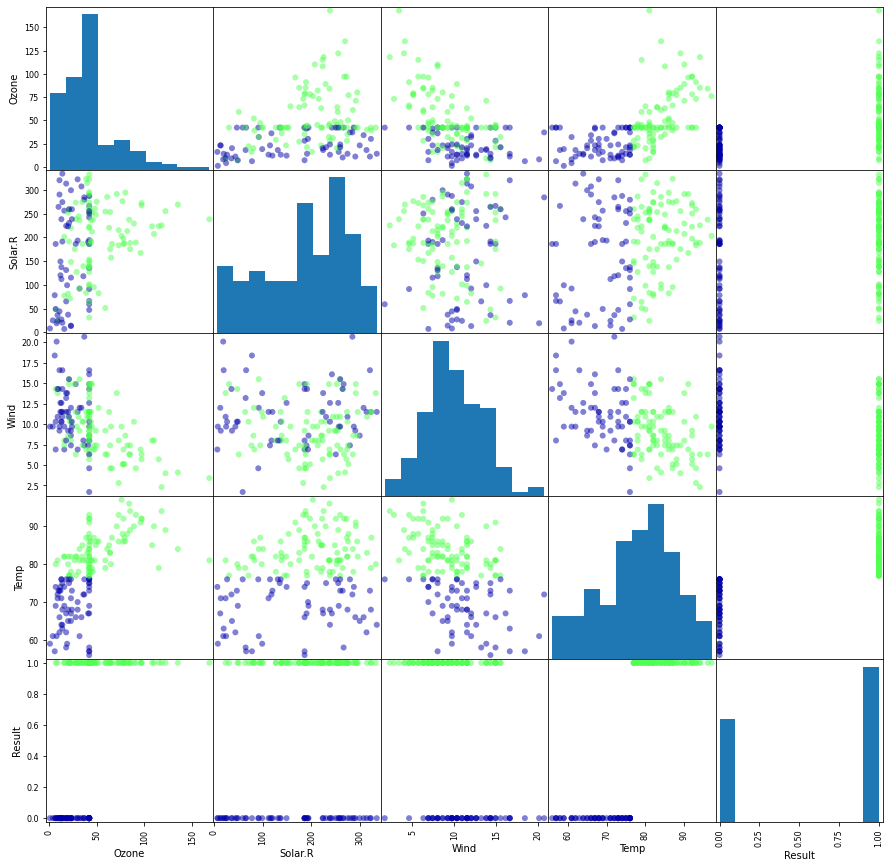

In [19]:
import mglearn

pd.plotting.scatter_matrix(df, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)

In [20]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Result"])
df_samp = pd.concat([X_samp, y_samp], axis=1)

X = df_samp[cols]
y = df_samp["Result"]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

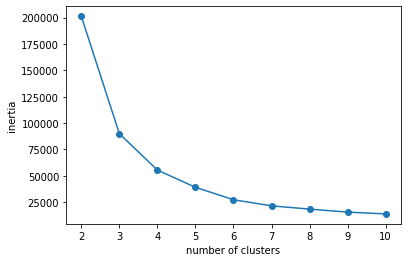

In [22]:
from sklearn.cluster import KMeans

# inertia는 클러스터링이 됐을 때 중심 좌표와 각 샘플과의 거리를 다 더한 것. 일종의 응집도
# 클러스터가 많아질수록 그 값이 작아짐
clusters = range(2,11)
inertias = []

for n in clusters:
    model = KMeans(n_clusters=n, random_state=10)
    model.fit(X_train)
    inertias.append(model.inertia_)

plt.plot(clusters, inertias, "-o")
plt.ylabel("inertia")
plt.xlabel("number of clusters")
plt.show()
# 엘보우elbow 기법 : inertia 값이 하강하다가 팔꿈치처럼 꺾이는 부분

In [23]:
model = KMeans(n_clusters=3, random_state=10)
print(model)
pred = model.fit_predict(X_train) # 학습도 하고 분류도 해보게 하는 fit_predict()
print(pred[:5])
pred = model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=3, random_state=10)
[0 2 0 2 2]
[0 2 1 2 2]


In [24]:
from sklearn.metrics import silhouette_score

# 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타냄
# 실루엣 계수가 클수록 좋은 모형
silhouette_score(X_test, pred)

0.48271642809543663

In [25]:
model = KMeans(n_clusters=2, random_state=10)
print(model)
pred = model.fit_predict(X_train)
print(pred[:5])
pred = model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=2, random_state=10)
[0 1 0 1 1]
[0 1 0 1 1]


In [26]:
silhouette_score(X_test, pred)
# 클러스터 2개가 3개보다 좋은 모형

0.5994980020859717

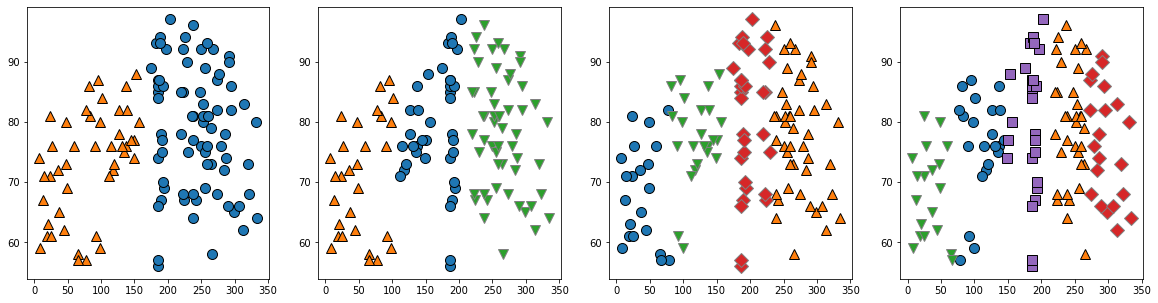

In [27]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20,5))

idx = 0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_

    mglearn.discrete_scatter(X["Solar.R"], X["Temp"], lbls, ax=axes[idx]) # 2차원 그래프라서 일조량과 온도만 씀
    idx+=1